In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nypd-complaint-data-historic-20062019/NYPD_Complaint_Data_Historic.csv


**Features**:


CMPLNT_NUM - Randomly generated persistent ID for each complaint

ADDR_PCT_CD - The precinct in which the incident occurred

BORO - The name of the borough in which the incident occurred

CMPLNT_FR_DT - Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)

CMPLNT_FR_TM - Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)

CMPLNT_TO_DT - Ending date of occurrence for the reported event, if exact time of occurrence is unknown

CMPLNT_TO_TM - Ending time of occurrence for the reported event, if exact time of occurrence is unknown

CRM_ATPT_CPTD_CD - Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely

HADEVELOPT - Name of NYCHA housing development of occurrence, if applicable

HOUSING_PSA - Development Level Code

JURISDICTION_CODE - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.

JURIS_DESC - Description of the jurisdiction code

KY_CD - Three digit offense classification code

LAW_CAT_CD - Level of offense: felony, misdemeanor, violation

LOC_OF_OCCUR_DESC - Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of

OFNS_DESC - Description of offense corresponding with key code

PARKS_NM - Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)

PATROL_BORO - The name of the patrol borough in which the incident occurred

PD_CD - Three digit internal classification code (more granular than Key Code)

PD_DESC - Description of internal classification corresponding with PD code (more granular than Offense Description)

PREM_TYP_DESC - Specific description of premises; grocery store, residence, street, etc.

RPT_DT - Date event was reported to police

STATION_NAME - Transit station name

SUSP_AGE_GROUP - Suspect’s Age Group

SUSP_RACE - Suspect’s Race Description

SUSP_SEX - Suspect’s Sex Description

TRANSIT_DISTRICT - Transit district in which the offense occurred.

VIC_AGE_GROUP - Victim’s Age Group

VIC_RACE - Victim’s Race Description

VIC_SEX - Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)

X_COORD_CD - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Y_COORD_CD - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Latitude - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

Longitude - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/nypd-complaint-data-historic-20062019/NYPD_Complaint_Data_Historic.csv",low_memory=False)

In [3]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,05/28/2015,15:00:00,NaN,NaN,46.0,06/01/2015,578,HARRASSMENT 2,638.0,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,642234217,10/28/2013,13:50:00,10/28/2013,13:50:00,120.0,10/28/2013,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,242465164,05/09/2012,20:50:00,05/09/2012,21:00:00,24.0,05/09/2012,236,DANGEROUS WEAPONS,782.0,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,927207428,01/03/2014,13:30:00,01/03/2014,13:35:00,108.0,01/03/2014,109,GRAND LARCENY,409.0,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,04/13/2016,00:00:00,NaN,NaN,40.0,04/13/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


In [4]:
# Check the distribution of 'OFNS_DESC' classes
class_counts = df['OFNS_DESC'].value_counts()
print(class_counts)

OFNS_DESC
PETIT LARCENY                      1165360
HARRASSMENT 2                       880644
ASSAULT 3 & RELATED OFFENSES        731300
CRIMINAL MISCHIEF & RELATED OF      699377
GRAND LARCENY                       607704
                                    ...   
FELONY SEX CRIMES                       10
ABORTION                                 7
OFFENSES AGAINST MARRIAGE UNCL           4
KIDNAPPING AND RELATED OFFENSES          3
UNDER THE INFLUENCE OF DRUGS             3
Name: count, Length: 71, dtype: int64


In [7]:
df.VIC_AGE_GROUP.unique()

array(['25-44', '45-64', nan, 'UNKNOWN', '18-24', '65+', '<18'],
      dtype=object)

In [6]:
import numpy as np

# Define valid age group labels
valid_age_groups = {'<18', '18-24', '25-44', '45-64', '65+', 'UNKNOWN'}

# Replace invalid entries with NaN
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].apply(lambda x: x if x in valid_age_groups else np.nan)

# Display the cleaned column and its unique values
print(df['VIC_AGE_GROUP'].unique())



['25-44' '45-64' nan 'UNKNOWN' '18-24' '65+' '<18']


In [33]:
df = df.dropna(subset=['VIC_AGE_GROUP'])


The dataset contains over 6 million crime reports from 2006 to 2022, with a total of 35 variables each.

After looking at the head of the dataset we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with the analysis.

In [34]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

LAW_CAT_CD                           0.0
Latitude                             0.0
Longitude                            0.0
VIC_AGE_GROUP                        0.0
YEAR                                 0.0
DAY_OF_WEEK                          0.0
MONTH                                0.0
VIC_RACE_ASIAN / PACIFIC ISLANDER    0.0
VIC_RACE_BLACK                       0.0
VIC_RACE_BLACK HISPANIC              0.0
VIC_RACE_OTHER                       0.0
VIC_RACE_UNKNOWN                     0.0
VIC_RACE_WHITE                       0.0
VIC_RACE_WHITE HISPANIC              0.0
VIC_SEX_FEMALE                       0.0
VIC_SEX_MALE                         0.0
VIC_SEX_Unknown                      0.0
month_sin                            0.0
month_cos                            0.0
dtype: float64

It is worth mention that some specific variables have a lot of NaN values, and they don't necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the drop() function.

In [10]:
df["SUSP_RACE"] = df["SUSP_RACE"].astype("category")
df["SUSP_RACE"] = df["SUSP_RACE"].cat.remove_categories("UNKNOWN")

In [11]:
# Conversion des colonnes de date et heure
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], errors='coerce')
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], errors='coerce')

# Extraire l'année pour les analyses temporelles
df['YEAR'] = df['CMPLNT_FR_DT'].dt.year

<Axes: ylabel='count'>

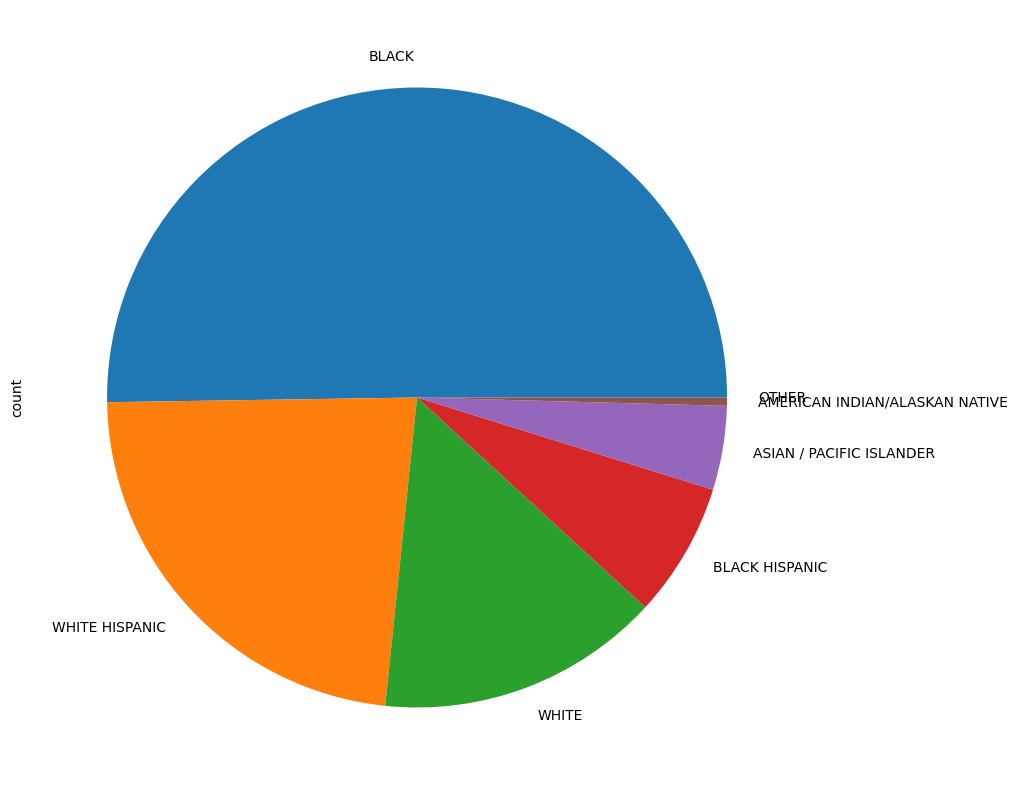

In [44]:
df['SUSP_RACE'].value_counts().plot(kind='pie',figsize=(10,15))

<Axes: xlabel='VIC_RACE'>

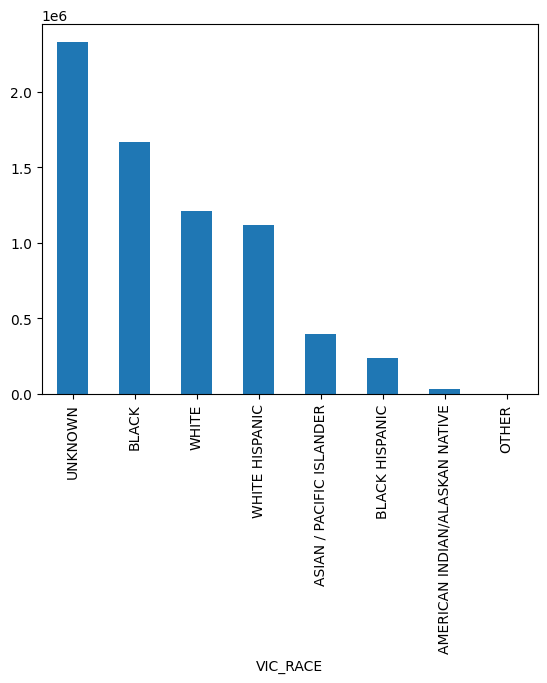

In [47]:
df['VIC_RACE'].value_counts().plot(kind='bar')

In [12]:
#dropping rows with NaN values
df.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)


In [13]:

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

#examing the changes
df.head(5)

Clean dataset: 
Observations:  5309178
Variables:  20


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,700381962,2015-05-28,15:00:00,2015-06-01,578,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,INSIDE,N.Y. POLICE DEPT,1007522.0,247458.0,40.845868,-73.915888,"(40.84586773, -73.915888033)",25-44,WHITE HISPANIC,F,2015.0
1,642234217,2013-10-28,13:50:00,2013-10-28,351,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,N.Y. POLICE DEPT,962835.0,167738.0,40.627061,-74.077149,"(40.627060894, -74.077149232)",45-64,WHITE,M,2013.0
3,927207428,2014-01-03,13:30:00,2014-01-03,109,GRAND LARCENY,ATTEMPTED,FELONY,QUEENS,INSIDE,N.Y. POLICE DEPT,1013552.0,210803.0,40.745242,-73.894253,"(40.745241809, -73.894253382)",45-64,ASIAN / PACIFIC ISLANDER,M,2014.0
4,492142357,2016-04-13,00:00:00,2016-04-13,351,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,BRONX,UNKNOWN,N.Y. POLICE DEPT,1005028.0,234516.0,40.810352,-73.924942,"(40.810351863, -73.924942326)",UNKNOWN,UNKNOWN,E,2016.0
5,572616350,2014-08-18,14:30:00,2014-08-18,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,N.Y. POLICE DEPT,1025425.0,188384.0,40.683660,-73.851542,"(40.683659778, -73.85154207)",18-24,WHITE,F,2014.0


In [14]:
df= df.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

EDA :

There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

array([<Axes: ylabel='count'>], dtype=object)

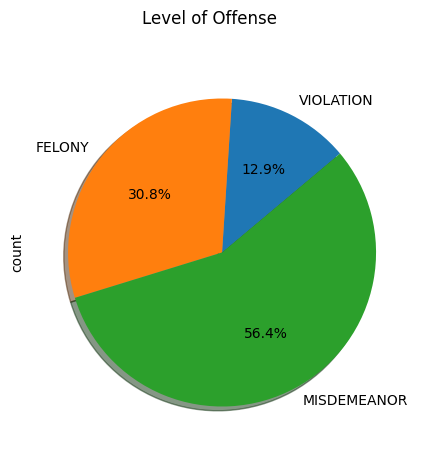

In [52]:
df['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

**data prepatration**

In [21]:
# Remplissage des valeurs manquantes
df['BORO_NM'].fillna('UNKNOWN', inplace=True)


/tmp/ipykernel_30/3241279412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BORO_NM'].fillna('UNKNOWN', inplace=True)


TypeError: Cannot setitem on a Categorical with a new category (UNKNOWN), set the categories first

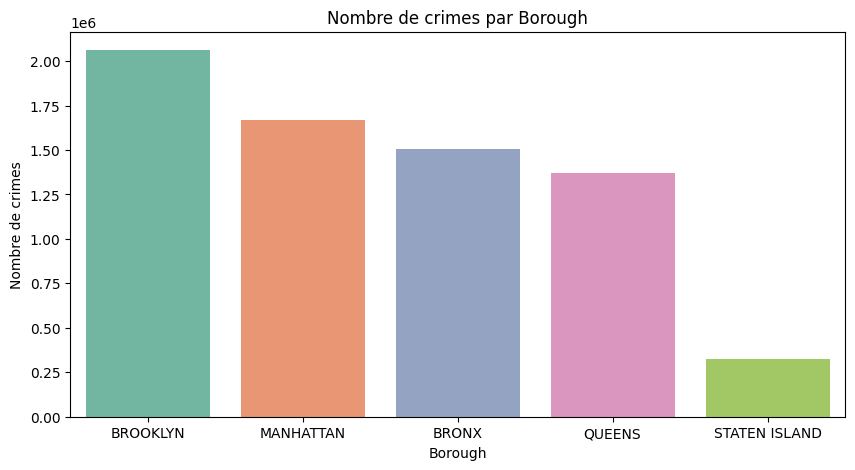

In [65]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='BORO_NM', palette='Set2', order=df['BORO_NM'].value_counts().index)
plt.title('Nombre de crimes par Borough')
plt.xlabel('Borough')
plt.ylabel('Nombre de crimes')
plt.show()


In [20]:
top_offenses = df['OFNS_DESC'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_offenses.values, y=top_offenses.index, palette='coolwarm')
plt.title('Top 10 des infractions')
plt.xlabel('Nombre de cas')
plt.ylabel('Infraction')
plt.show()


NameError: name 'plt' is not defined

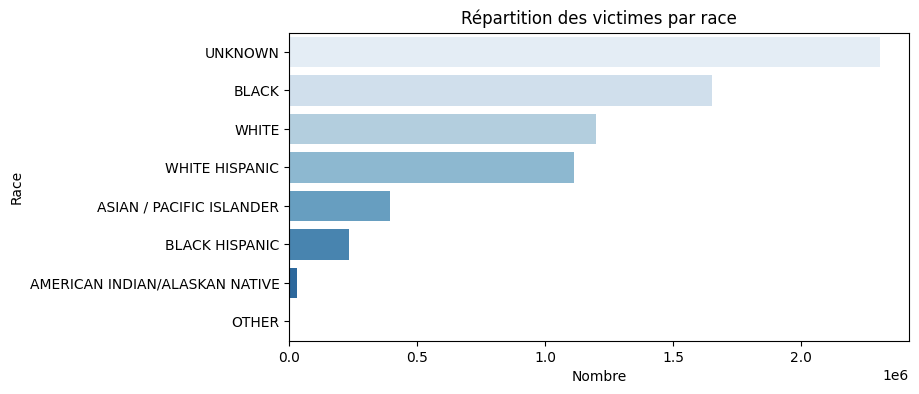

In [67]:

# Race
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='VIC_RACE', order=df['VIC_RACE'].value_counts().index, palette='Blues')
plt.title('Répartition des victimes par race')
plt.ylabel('Race')
plt.xlabel('Nombre')
plt.show()


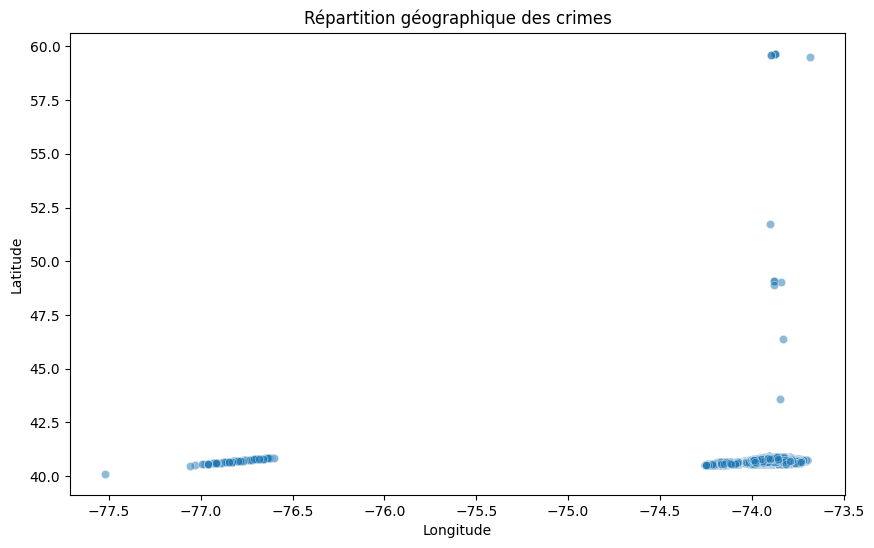

In [68]:
# Carte des crimes 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], alpha=0.5)
plt.title('Répartition géographique des crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [19]:
df['MONTH'] = df['CMPLNT_FR_DT'].dt.month
crimes_per_month = df['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=crimes_per_month.index, y=crimes_per_month.values, palette='coolwarm')
plt.title('Crimes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de crimes')
plt.xticks(range(0, 12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'], rotation=45)
plt.show()


NameError: name 'plt' is not defined

In [18]:
df['DAY_OF_WEEK'] = df['CMPLNT_FR_DT'].dt.day_name()
crimes_per_day = df['DAY_OF_WEEK'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=crimes_per_day.index, y=crimes_per_day.values, palette='Set2')
plt.title('Crimes par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de crimes')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
df.info()

In [17]:
df.VIC_AGE_GROUP.unique()

['25-44', '45-64', 'UNKNOWN', '18-24', '65+', '<18']
Categories (6, object): ['18-24', '25-44', '45-64', '65+', '<18', 'UNKNOWN']

In [16]:
# Reduce memory usage
def reduce_memory(df):
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type == 'int64':
            df[col] = df[col].astype('int32')
        elif col_type == 'object':
            if df[col].nunique() < 0.5 * len(df):  # Check cardinality
                df[col] = df[col].astype('category')
    return df

df = reduce_memory(df)

# Check memory usage after reduction
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5309178 entries, 0 to 6983204
Data columns (total 20 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CMPLNT_NUM         int32         
 1   CMPLNT_FR_DT       datetime64[ns]
 2   CMPLNT_FR_TM       category      
 3   RPT_DT             datetime64[ns]
 4   KY_CD              int32         
 5   OFNS_DESC          category      
 6   CRM_ATPT_CPTD_CD   category      
 7   LAW_CAT_CD         category      
 8   BORO_NM            category      
 9   LOC_OF_OCCUR_DESC  category      
 10  JURIS_DESC         category      
 11  X_COORD_CD         float64       
 12  Y_COORD_CD         float64       
 13  Latitude           float64       
 14  Longitude          float64       
 15  Lat_Lon            category      
 16  VIC_AGE_GROUP      category      
 17  VIC_RACE           category      
 18  VIC_SEX            category      
 19  YEAR               float64       
dtypes: category(11), datetime64[n

In [22]:
df.columns = df.columns.str.strip()


In [23]:
df.drop(['X_COORD_CD', 'Y_COORD_CD'], axis=1, inplace=True)


In [77]:
#splitting the data and target b

In [24]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR,DAY_OF_WEEK,MONTH
0,700381962,2015-05-28,15:00:00,2015-06-01,578,HARASSMENT,COMPLETED,VIOLATION,BRONX,INSIDE,N.Y. POLICE DEPT,40.845868,-73.915888,"(40.84586773, -73.915888033)",25-44,WHITE HISPANIC,FEMALE,2015.0,Thursday,5
1,642234217,2013-10-28,13:50:00,2013-10-28,351,CRIMINAL MISCHIEF,COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,N.Y. POLICE DEPT,40.627061,-74.077149,"(40.627060894, -74.077149232)",45-64,WHITE,MALE,2013.0,Monday,10
3,927207428,2014-01-03,13:30:00,2014-01-03,109,GRAND LARCENY,ATTEMPTED,FELONY,QUEENS,INSIDE,N.Y. POLICE DEPT,40.745242,-73.894253,"(40.745241809, -73.894253382)",45-64,ASIAN / PACIFIC ISLANDER,MALE,2014.0,Friday,1
4,492142357,2016-04-13,00:00:00,2016-04-13,351,CRIMINAL MISCHIEF,COMPLETED,MISDEMEANOR,BRONX,UNKNOWN,N.Y. POLICE DEPT,40.810352,-73.924942,"(40.810351863, -73.924942326)",UNKNOWN,UNKNOWN,UNKNOWN,2016.0,Wednesday,4
5,572616350,2014-08-18,14:30:00,2014-08-18,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,N.Y. POLICE DEPT,40.683660,-73.851542,"(40.683659778, -73.85154207)",18-24,WHITE,FEMALE,2014.0,Monday,8


In [25]:
# Drop columns from the DataFrame
columns_to_drop = ['CRM_ATPT_CPTD_CD','OFNS_DESC','KY_CD','Lat_Lon', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'RPT_DT', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'JURIS_DESC']
df.drop(columns=columns_to_drop, inplace=True)




In [26]:

# VIC_AGE_GROUP
age_mapping = {'UNKNOWN': -1, '18-24': 1, '25-44': 2, '45-64': 3, '65+': 4}
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].map(age_mapping)

# VIC_RACE
df = pd.get_dummies(df, columns=['VIC_RACE'], drop_first=True)

# VIC_SEX
df['VIC_SEX'] = df['VIC_SEX'].replace({'UNKNOWN': 'Unknown', 'BUSINESS/ORGANIZATION': 'Other'})
df = pd.get_dummies(df, columns=['VIC_SEX'], drop_first=True)

# YEAR
df['YEAR'] = (df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

# MONTH
df['month_sin'] = np.sin(2 * np.pi * df['MONTH'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['MONTH'] / 12)

# DAY_OF_WEEK
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map(day_mapping)


/tmp/ipykernel_30/1534684385.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['VIC_SEX'] = df['VIC_SEX'].replace({'UNKNOWN': 'Unknown', 'BUSINESS/ORGANIZATION': 'Other'})


In [27]:
df.head()

,LAW_CAT_CD,Latitude,Longitude,VIC_AGE_GROUP,YEAR,DAY_OF_WEEK,MONTH,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_FEMALE,VIC_SEX_MALE,VIC_SEX_Unknown,month_sin,month_cos
0,VIOLATION,40.845868,-73.915888,2.0,0.966387,3,5,False,False,False,False,False,False,True,True,False,False,0.500000,-0.866025
1,MISDEMEANOR,40.627061,-74.077149,3.0,0.949580,0,10,False,False,False,False,False,True,False,False,True,False,-0.866025,0.500000
3,FELONY,40.745242,-73.894253,3.0,0.957983,4,1,True,False,False,False,False,False,False,False,True,False,0.500000,0.866025
4,MISDEMEANOR,40.810352,-73.924942,-1.0,0.974790,2,4,False,False,False,False,True,False,False,False,False,True,0.866025,-0.500000
5,MISDEMEANOR,40.683660,-73.851542,1.0,0.957983,0,8,False,False,False,False,False,True,False,True,False,False,-0.866025,-0.500000


In [28]:
target_class = ['LAW_CAT_CD']

In [35]:
y=df[target_class]
x=df.drop(target_class,axis=1)

In [36]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Flatten the target to 1D before encoding
y_train_encoded = label_encoder.fit_transform(y_train.values.flatten())
y_val_encoded = label_encoder.transform(y_val.values.flatten())
# Check the encoded target values for training and validation
print("Encoded training target:", y_train_encoded[:5])
print("Encoded validation target:", y_val_encoded[:5])


Encoded training target: [1 0 0 0 0]
Encoded validation target: [0 1 0 2 2]


In [32]:
X_train

,Latitude,Longitude,VIC_AGE_GROUP,YEAR,DAY_OF_WEEK,MONTH,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_FEMALE,VIC_SEX_MALE,VIC_SEX_Unknown,month_sin,month_cos
2110743,40.594517,-73.965683,1.0,0.974790,5,3,False,False,False,False,False,True,False,True,False,False,1.000000e+00,6.123234e-17
5490627,40.712706,-73.900596,3.0,0.890756,0,5,False,False,False,False,False,True,False,True,False,False,5.000000e-01,-8.660254e-01
5255498,40.737743,-73.978484,2.0,0.915966,4,12,True,False,False,False,False,False,False,True,False,False,-2.449294e-16,1.000000e+00
3127990,40.832140,-73.865463,3.0,0.949580,1,8,False,True,False,False,False,False,False,True,False,False,-8.660254e-01,-5.000000e-01
2198344,40.866432,-73.847153,3.0,0.957983,5,9,False,False,False,False,False,True,False,True,False,False,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871001,40.675576,-74.007262,1.0,0.974790,4,1,False,True,False,False,False,False,False,True,False,False,5.000000e-01,8.660254e-01
2708002,40.636872,-74.152864,1.0,0.949580,5,8,False,True,False,False,False,False,False,True,False,False,-8.660254e-01,-5.000000e-01
6599219,40.715267,-73.773165,4.0,0.991597,1,8,False,False,False,False,True,False,False,True,False,False,-8.660254e-01,-5.000000e-01
5732514,40.790322,-73.947687,NaN,0.907563,4,10,False,False,False,False,False,False,True,True,False,False,-8.660254e-01,5.000000e-01


In [40]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train_encoded)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train_encoded)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 609
[LightGBM] [Info] Number of data points in the train set: 3986672, number of used features: 17
[LightGBM] [Info] Start training from score -1.132893
[LightGBM] [Info] Start training from score -0.651604
[LightGBM] [Info] Start training from score -1.853481


NameError: name 'X_test' is not defined

In [41]:

# Predictions and evaluation
lgb_pred = lgb_model.predict(X_val)
xgb_pred = xgb_model.predict(X_val)

# Evaluate the models
lgb_accuracy = accuracy_score(y_val_encoded, lgb_pred)
xgb_accuracy = accuracy_score(y_val_encoded, xgb_pred)

print(f"LightGBM Accuracy: {lgb_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")


LightGBM Accuracy: 0.5296879201499396
XGBoost Accuracy: 0.5312621655355645


In [46]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(xgb.XGBClassifier(), param_grid, n_iter=10, cv=3)
xgb_search.fit(X_train, y_train_encoded)

print("Best hyperparameters for XGBoost: ", xgb_search.best_params_)


Best hyperparameters for XGBoost:  {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05}


In [47]:
# Using the best hyperparameters to train the final XGBoost model
best_xgb = xgb.XGBClassifier(
    max_depth=10, 
    learning_rate=0.05, 
    n_estimators=300, 
    subsample=1.0
)

# Train the model
best_xgb.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
xgb_pred = best_xgb.predict(X_val)
xgb_accuracy = accuracy_score(y_val_encoded, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.5333089855398186


In [44]:
import joblib

# Save the model
joblib.dump(xgb_model, 'XGB_model.joblib')



['XGB_model.joblib']